# Louisville Kentucky Restaurant Scores

## Summary:

This is a project for Code Louisville Data Analysis 1. The data being used comes from the Louisville Metro Open Data website (https://data.louisvilleky.gov). This data is being used to analyze passing restaurant health department scores in the Louisville Kentucky Metro area.

Hypothesis: The average passing score for a regular inspection will be over 90. And restaurants in the downtown Louisville zip code - 40202 - will have better scores than other zip codes.

## Data Reading:

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df_scores = pd.read_csv('Louisville_Metro_KY_-_Restaurant_Inspection_Scores.csv')
df_scores

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,PlaceName,Address,Address2,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,Intersection,OBJECTID
0,29956,1684470,REGULAR,CVS #6211,NaN,3721 LEXINGTON RD,NaN,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022/07/06 00:00:00,100.0,NaN,CVS #6211,NaN,0
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,NaN,542 LAMPTON ST,NaN,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022/09/07 00:00:00,97.0,NaN,NEIGHBORHOOD FOOD MART,NaN,1
2,30043,1637804,REGULAR,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,94.0,A,F&Y SUPERMARKET,NaN,2
3,30043,1637805,REGULAR,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,95.0,NaN,F&Y SUPERMARKET,NaN,3
4,30043,1700824,FOLLOWUP,F&Y SUPERMARKET,NaN,3801 W MARKET ST,NaN,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022/09/12 00:00:00,98.0,NaN,F&Y SUPERMARKET,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,116688,1707224,OTHER,PAPA MURPHY'S,NaN,12535 SHELBYVILLE RD,NaN,LOUISVILLE,KY,40243,FOOD SERVICE,2022/09/07 00:00:00,99.0,NaN,PAPA MURPHY'S,NaN,7000
7001,116689,1707232,OTHER,VALHALLA GOLF CLUB,NaN,15503 SHELBYVILLE RD,NaN,LOUISVILLE,KY,40245,FOOD SERVICE,2022/09/08 00:00:00,100.0,NaN,VALHALLA GOLF CLUB,NaN,7001
7002,116690,1707246,OTHER,VINAIGRETTE SALAD KITCHEN,NaN,4037 SUMMIT PLAZA DR,NaN,LOUISVILLE,KY,40241,FOOD SERVICE,2022/09/09 00:00:00,99.0,NaN,VINAIGRETTE SALAD KITCHEN,NaN,7002
7003,116693,1707248,OTHER,SUBWAY,NaN,231 E CHESTNUT ST,NaN,LOUISVILLE,KY,40202,FOOD SERVICE,2022/09/13 00:00:00,100.0,NaN,SUBWAY,NaN,7003


## Data Cleaning:

Cleaning data by deleting specific empty columns:

In [28]:
df_clean = df_scores.drop(['PlaceName', 'Address2', 'Intersection'], axis='columns')
df_clean

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
0,29956,1684470,REGULAR,CVS #6211,3721 LEXINGTON RD,LOUISVILLE,KY,40207,PRE-PACKAGED RETAIL,2022/07/06 00:00:00,100.0,NaN,CVS #6211,0
1,29967,1699737,REGULAR,NEIGHBORHOOD FOOD MART,542 LAMPTON ST,LOUISVILLE,KY,40203,SUPERMARKET WITH PROCESSING,2022/09/07 00:00:00,97.0,NaN,NEIGHBORHOOD FOOD MART,1
2,30043,1637804,REGULAR,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,94.0,A,F&Y SUPERMARKET,2
3,30043,1637805,REGULAR,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2021/11/22 00:00:00,95.0,NaN,F&Y SUPERMARKET,3
4,30043,1700824,FOLLOWUP,F&Y SUPERMARKET,3801 W MARKET ST,LOUISVILLE,KY,40212,"RETAIL-FOOD 10,000 SQ FT OR LESS",2022/09/12 00:00:00,98.0,NaN,F&Y SUPERMARKET,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,116688,1707224,OTHER,PAPA MURPHY'S,12535 SHELBYVILLE RD,LOUISVILLE,KY,40243,FOOD SERVICE,2022/09/07 00:00:00,99.0,NaN,PAPA MURPHY'S,7000
7001,116689,1707232,OTHER,VALHALLA GOLF CLUB,15503 SHELBYVILLE RD,LOUISVILLE,KY,40245,FOOD SERVICE,2022/09/08 00:00:00,100.0,NaN,VALHALLA GOLF CLUB,7001
7002,116690,1707246,OTHER,VINAIGRETTE SALAD KITCHEN,4037 SUMMIT PLAZA DR,LOUISVILLE,KY,40241,FOOD SERVICE,2022/09/09 00:00:00,99.0,NaN,VINAIGRETTE SALAD KITCHEN,7002
7003,116693,1707248,OTHER,SUBWAY,231 E CHESTNUT ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/09/13 00:00:00,100.0,NaN,SUBWAY,7003


Filter data to only show establishments listed as Food Service, so as to mainly focus on restaurants. This will exclude establishments such as supermarkets, school cafeterias, etc:

In [29]:
df = df_clean.query("TypeDescription == 'FOOD SERVICE'")
df

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
71,31334,1652908,REGULAR,GOOD SAMARITAN,3500 GOOD SAMARITAN WAY,LOUISVILLE,KY,40299,FOOD SERVICE,2022/02/17 00:00:00,100.0,A,GOOD SAMARITAN,71
72,31334,1693461,REGULAR,GOOD SAMARITAN,3500 GOOD SAMARITAN WAY,LOUISVILLE,KY,40299,FOOD SERVICE,2022/08/10 00:00:00,98.0,A,GOOD SAMARITAN,72
255,32112,1631446,REGULAR,CHEDDAR BOX,3909 CHENOWETH SQUARE,LOUISVILLE,KY,40207,FOOD SERVICE,2021/10/22 00:00:00,87.0,C,CHEDDAR BOX,255
256,32112,1633737,COMPLAINT,CHEDDAR BOX,3909 CHENOWETH SQUARE,LOUISVILLE,KY,40207,FOOD SERVICE,2021/10/22 00:00:00,NaN,NaN,CHEDDAR BOX,256
257,32112,1633738,FOLLOWUP,CHEDDAR BOX,3909 CHENOWETH SQUARE,LOUISVILLE,KY,40207,FOOD SERVICE,2021/10/29 00:00:00,NaN,NaN,CHEDDAR BOX,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,116688,1707224,OTHER,PAPA MURPHY'S,12535 SHELBYVILLE RD,LOUISVILLE,KY,40243,FOOD SERVICE,2022/09/07 00:00:00,99.0,NaN,PAPA MURPHY'S,7000
7001,116689,1707232,OTHER,VALHALLA GOLF CLUB,15503 SHELBYVILLE RD,LOUISVILLE,KY,40245,FOOD SERVICE,2022/09/08 00:00:00,100.0,NaN,VALHALLA GOLF CLUB,7001
7002,116690,1707246,OTHER,VINAIGRETTE SALAD KITCHEN,4037 SUMMIT PLAZA DR,LOUISVILLE,KY,40241,FOOD SERVICE,2022/09/09 00:00:00,99.0,NaN,VINAIGRETTE SALAD KITCHEN,7002
7003,116693,1707248,OTHER,SUBWAY,231 E CHESTNUT ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/09/13 00:00:00,100.0,NaN,SUBWAY,7003


## Data Manipulation:

Average passing restaurant score of all inspection types:

In [30]:
avg_score_df = df['score'].mean()
print(avg_score_df)

97.44777306468717


Lowest 10 passing scores:

In [31]:
df.nsmallest(10, ['score'])

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
3818,100533,1639075,REGULAR,EL NOPAL,962 BAXTER AVE,LOUISVILLE,KY,40204,FOOD SERVICE,2021/11/30 00:00:00,70.0,C,EL NOPAL,3818
686,34687,1655300,REGULAR,SOUTH PARK COUNTRY CLUB,915 S PARK RD,LOUISVILLE,KY,40118,FOOD SERVICE,2022/03/01 00:00:00,73.0,C,SOUTH PARK COUNTRY CLUB,686
1599,67343,1648889,REGULAR,AUGUST MOON,2269 LEXINGTON RD,LOUISVILLE,KY,40206,FOOD SERVICE,2022/01/27 00:00:00,73.0,C,AUGUST MOON,1599
3787,100280,1632435,REGULAR,TIME FOR THAI,2206 FRANKFORT AVE,LOUISVILLE,KY,40206,FOOD SERVICE,2021/10/26 00:00:00,75.0,C,TIME FOR THAI,3787
5648,111723,1637801,REGULAR,BANAADIR RESTAURANT,5600 S 3RD ST,LOUISVILLE,KY,40214,FOOD SERVICE,2021/11/22 00:00:00,76.0,C,BANAADIR RESTAURANT,5648
5912,112909,1703857,REGULAR,TAQUERIA LOS GORDITOS,2017 BROWNSBORO RD STE B,LOUISVILLE,KY,40206,FOOD SERVICE,2022/09/26 00:00:00,76.0,C,TAQUERIA LOS GORDITOS,5912
3490,97563,1660756,REGULAR,GUANAQUITA RESTAURANT,4231 TAYLOR BLVD,LOUISVILLE,KY,40215,FOOD SERVICE,2022/03/24 00:00:00,77.0,C,GUANAQUITA RESTAURANT,3490
4772,106862,1693288,REGULAR,TOWNEPLACE SUITES,6601 PARAMOUNT PARK DR,LOUISVILLE,KY,40213,FOOD SERVICE,2022/08/10 00:00:00,77.0,C,TOWNEPLACE SUITES,4772
6181,114056,1645680,REGULAR,LIMA'S BAKERY,5600 NATIONAL TURNPIKE STE 2,LOUISVILLE,KY,40214,FOOD SERVICE,2022/01/10 00:00:00,77.0,C,LIMA'S BAKERY,6181
6507,114799,1662171,REGULAR,CHICAGO'S JERK TACOS,227 S 30TH ST,LOUISVILLE,KY,40212,FOOD SERVICE,2022/03/30 00:00:00,77.0,C,CHICAGO'S JERK TACOS,6507


Highest 10 passing scores:

In [32]:
df.nlargest(10, ['score'])

,EstablishmentID,InspectionID,Ins_TypeDesc,EstablishmentName,Address,City,State,Zip,TypeDescription,InspectionDate,score,Grade,NameSearch,OBJECTID
71,31334,1652908,REGULAR,GOOD SAMARITAN,3500 GOOD SAMARITAN WAY,LOUISVILLE,KY,40299,FOOD SERVICE,2022/02/17 00:00:00,100.0,A,GOOD SAMARITAN,71
283,32604,1666534,REGULAR,MOBY DICK,9150 DIXIE HWY,LOUISVILLE,KY,40272,FOOD SERVICE,2022/04/20 00:00:00,100.0,A,MOBY DICK,283
420,33115,1653856,REGULAR,HAMPTON INN & SUITES,101 E JEFFERSON ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/02/22 00:00:00,100.0,A,HAMPTON INN & SUITES,420
434,33256,1637279,REGULAR,PAVILION CAFE,315 E BROADWAY,LOUISVILLE,KY,40202,FOOD SERVICE,2021/11/18 00:00:00,100.0,A,PAVILION CAFE,434
436,33262,1661261,REGULAR,NORTON ST MATTHEWS HOSPITAL,4001 DUTCHMANS LN,LOUISVILLE,KY,40207,FOOD SERVICE,2022/03/28 00:00:00,100.0,A,NORTON ST MATTHEWS HOSPITAL,436
442,33317,1652772,REGULAR,LYNDON ELKS LODGE #2052,904 ORMSBY LN,LOUISVILLE,KY,40242,FOOD SERVICE,2022/02/16 00:00:00,100.0,A,LYNDON ELKS LODGE #2052,442
443,33317,1696224,REGULAR,LYNDON ELKS LODGE #2052,904 ORMSBY LN,LOUISVILLE,KY,40242,FOOD SERVICE,2022/08/23 00:00:00,100.0,A,LYNDON ELKS LODGE #2052,443
465,33443,1653851,REGULAR,SUBWAY,725 W MAIN ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/02/21 00:00:00,100.0,A,SUBWAY,465
466,33443,1694013,REGULAR,SUBWAY,725 W MAIN ST,LOUISVILLE,KY,40202,FOOD SERVICE,2022/08/12 00:00:00,100.0,A,SUBWAY,466
469,33519,1666525,REGULAR,DAIRY DELIGHT,8691 PRESTON HWY,LOUISVILLE,KY,40219,FOOD SERVICE,2022/04/20 00:00:00,100.0,A,DAIRY DELIGHT,469


How many inspections were done in each zip code:

In [33]:
df['Zip'].value_counts()

40202    549
40207    328
40219    290
40222    256
40209    222
40206    217
40213    198
40241    196
40214    180
40299    175
40243    141
40204    138
40203    131
40291    130
40223    119
40272    116
40217     97
40258     94
40245     86
40229     86
40059     73
40228     55
40216     55
40211     52
40212     50
40205     31
40218     28
40220     26
40118     23
40210     19
40242     16
40215     13
40041      5
40208      5
40177      2
40023      2
40225      2
Name: Zip, dtype: int64

Average score of each type of inspection:

In [34]:
df = df.dropna(axis=0, subset='score')
df_average = df[['score', 'Ins_TypeDesc']]
df_average.groupby('Ins_TypeDesc').mean()

,score
Ins_TypeDesc,
COMPLAINT,90.750000
FOLLOWUP,98.414894
OTHER,98.546341
REGULAR,97.335016
SURVEY,97.375000


## Data Visualization:

Visualization of average of each type of inspection:

Text(0, 0.5, 'Score')

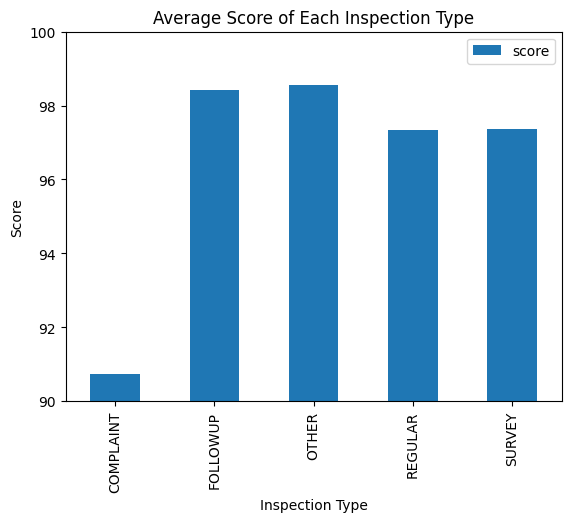

In [35]:
graph = df_average.groupby('Ins_TypeDesc').mean()
ax1 = graph.plot(kind='bar')
ax1.set_ylim(90, 100)
plt.title('Average Score of Each Inspection Type')
plt.xlabel('Inspection Type')
plt.ylabel('Score')



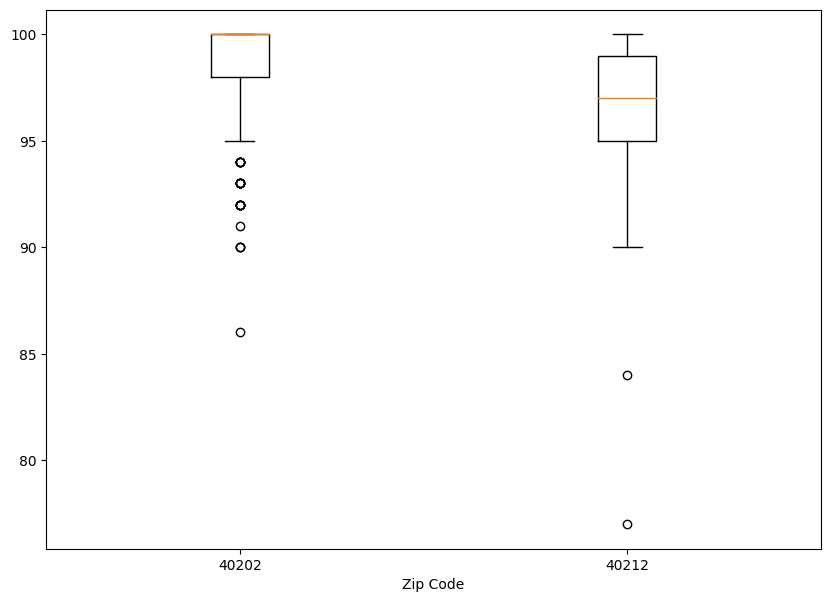

In [38]:
scores_40202 = df[df['Zip'] == 40202]['score']
scores_40212 = df[df['Zip'] == 40212]['score']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([scores_40202, scores_40212])
plt.xlabel('Zip Code')
plt.xticks([1, 2], ['40202', '40212'])
# show plot
plt.show()


## Analysis:

My findings show that the most inspections done are regular inspections. Regular inspections do have a lower average score than followup inspections. Inspections due to complaints have a much lower average score than all other inspection types. Restaurants in the ____ zip codes vary in their scores vs some other zip codes like ____. This leads me to believe___________-.